In [1]:
# Importing the necessary library
import librosa
import pandas as pd
import numpy as np
import re
import IPython.display as ipd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as sk
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns


In [2]:
# analysing the output of librosa.load(audio file)
audio_path = "E:\\personal files\\dataset\\Language Detection Dataset\\Malayalam\\9999.mp3"

# Visualising the audio

In [3]:
# analysing the output of librosa.load(audio file)
y, sr = librosa.load(audio_path)
print("The {} is stored as:- {} format with a shape of: {}".format(audio_path,type(y),y.shape))
print("The format of the sampling rate is:- ",type(sr))

The E:\personal files\dataset\Language Detection Dataset\Malayalam\9999.mp3 is stored as:- <class 'numpy.ndarray'> format with a shape of: (109831,)
The format of the sampling rate is:-  <class 'int'>


In [4]:
# playing the audio file
ipd.Audio(audio_path)

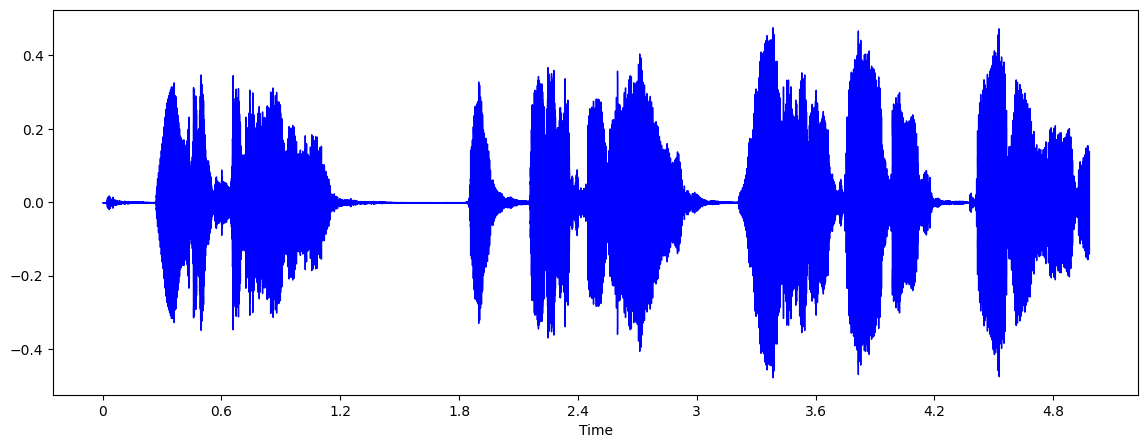

In [5]:
# displaying the audio file in the wave format.
y, sr = librosa.load(audio_path)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color='blue')

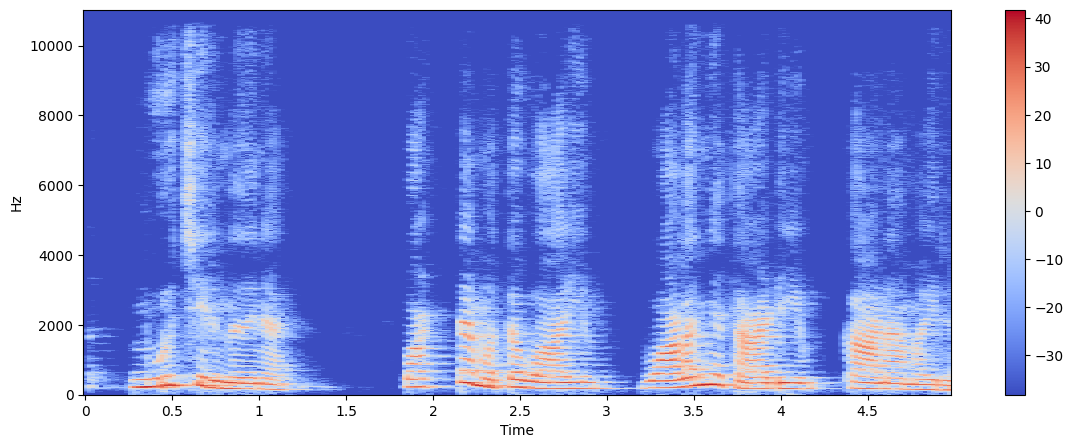

In [6]:
#display Spectrogram
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

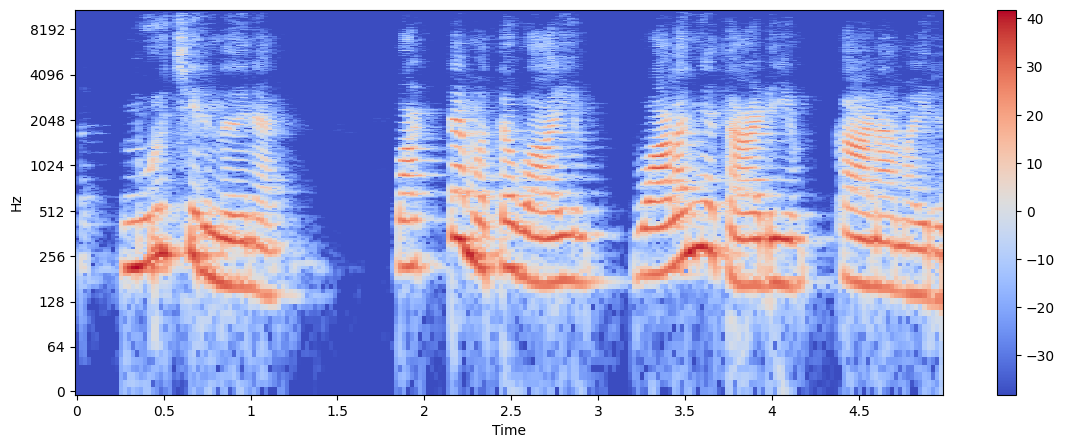

In [7]:
# plotting Spectrogram based on the log of frequencies
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

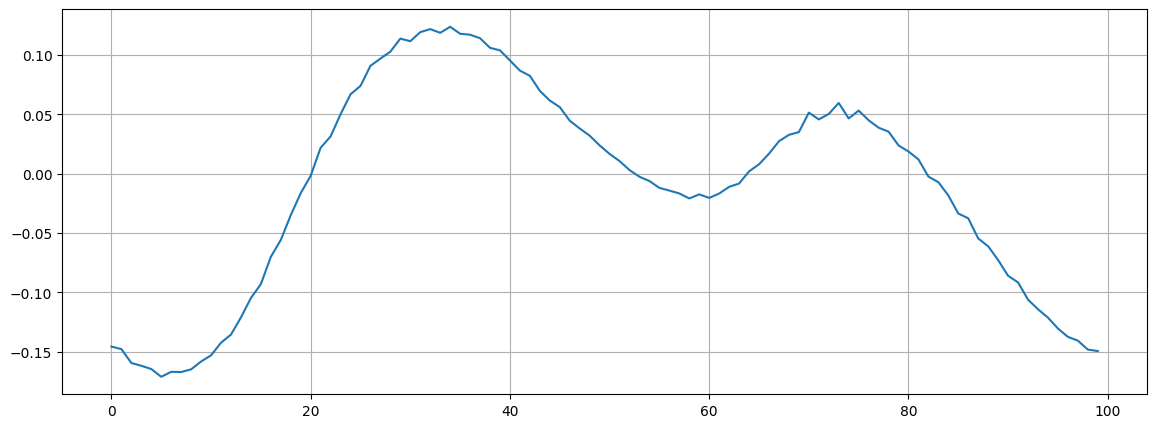

In [8]:
# Zooming in
# This code zooms in on a specific segment of an audio signal (defined by the indices n0 and n1) and plots the waveform of that segment, 
# providing a detailed view of the audio signal in that particular range. 
# This type of visualization is often useful in audio analysis to inspect specific portions of the signal for characteristics such as amplitude, frequency content, or other features.

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()


In [9]:
# In audio analysis, zero-crossings are often used as a feature to characterize the rate of change in the audio signal. 
# A high number of zero-crossings can indicate a signal with rapid changes in amplitude, which might be associated with percussive or high-frequency components.
# This information can be valuable for tasks such as audio classification or segmentation.

zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

4


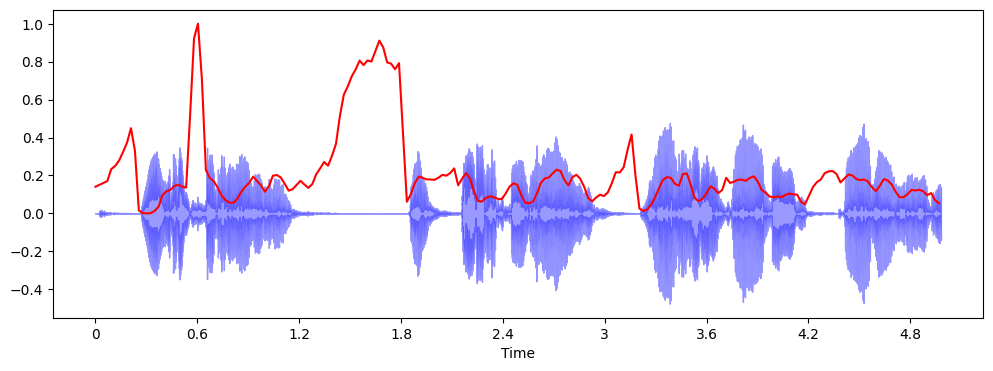

In [10]:
# spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

# spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sk.minmax_scale(y, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_centroids), color='r')

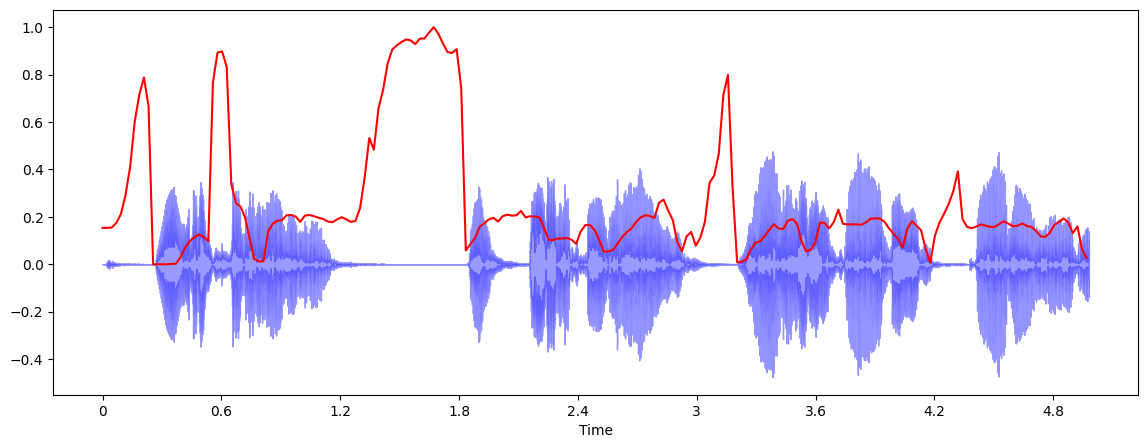

In [11]:
# generates a visual representation of an audio signal, overlaying the waveform in blue and plotting the normalized spectral rolloff in red. 
# This provides insights into the frequency content of the audio signal and highlight the regions where most of the spectral energy is concentrated. 
# The spectral rolloff information can be valuable in tasks such as music genre classification or audio content analysis.

# spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')

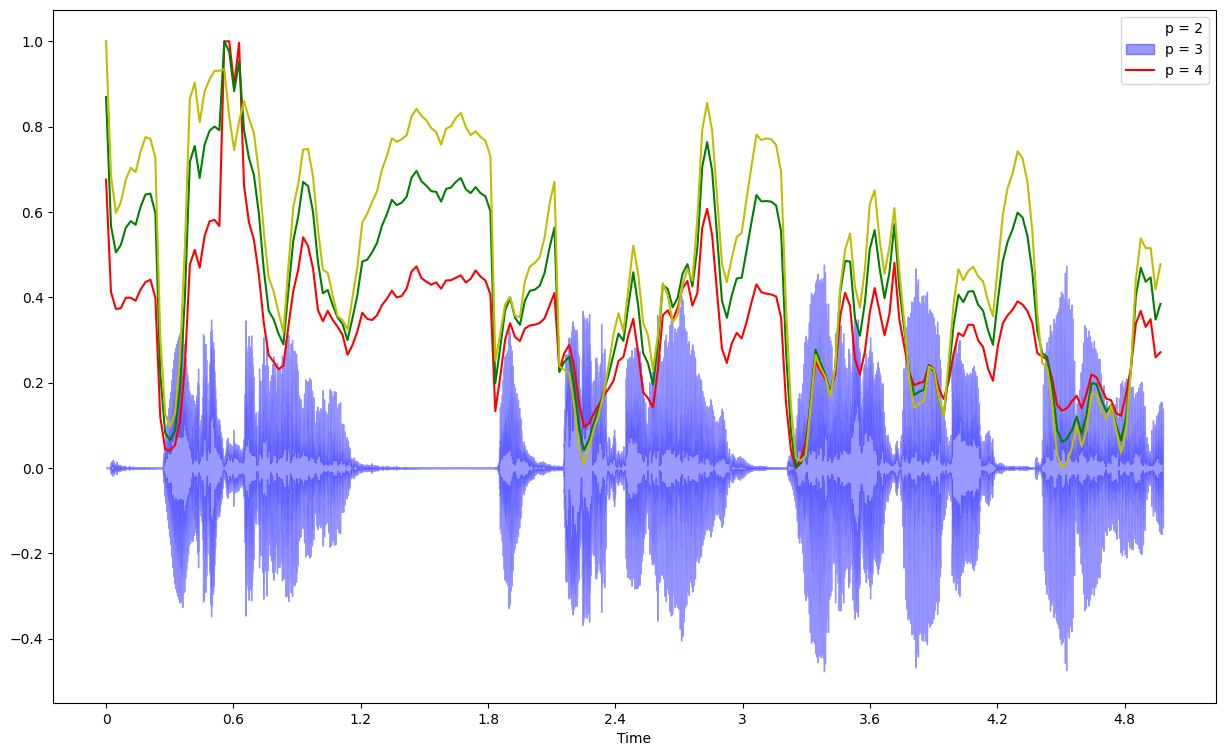

In [12]:
# visual representation of the spectral bandwidth of an audio signal for different power parameters. 
# The variations in spectral bandwidth for different 'p' values can give insights into the distribution of frequencies in the audio signal.

# spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr)[0]
# spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=3)[0]
# spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.01, sr=sr, p=4)[0]

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]

plt.figure(figsize=(15, 9))

librosa.display.waveshow(y, sr=sr, alpha=0.4,color='b')

plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

(20, 215)


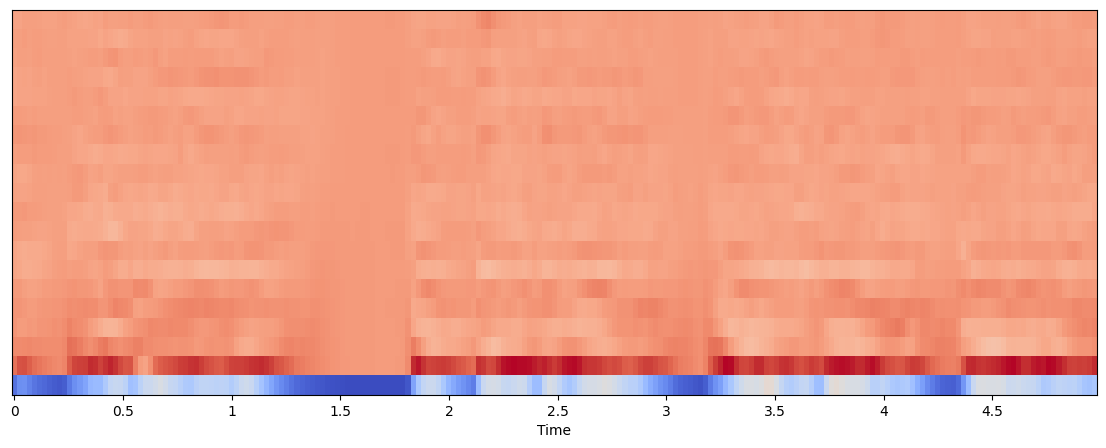

In [13]:
# computes the MFCCs of an audio signal and then displays them as a spectrogram. 
# MFCCs are commonly used in audio analysis, especially in tasks like speech and sound recognition, 
# because they capture important features of the audio signal that are relevant for distinguishing between different sounds. 
# The spectrogram visualization provides a time-frequency representation of the MFCCs, making it easier to interpret the audio features over time.

#mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [14]:
#load the csv file
csv_file="Indian-Languages-dataset.csv"
data = pd.read_csv(csv_file)

In [15]:
# view the content of the csv file
data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.378962,0.075027,1125.811219,1425.920156,2093.505859,-308.955444,165.863541,3.930830,32.273251,-2.041555,...,-5.752131,3.574875,-6.512062,2.243742,-7.150901,-2.844063,4.184847,-6.980238,-1.396759,Bengali
1,0.287429,0.063527,1412.054155,1389.028518,2676.877612,-386.766846,105.597565,-9.236642,4.014803,-20.703848,...,-11.379738,-9.108733,-9.926735,-12.386802,-12.014412,-11.111788,-11.034115,-6.772056,-1.708903,Bengali
2,0.316048,0.040670,1184.343827,1540.363703,2214.630127,-345.120148,148.906219,2.951180,32.668137,4.811650,...,-2.420877,-1.027839,-8.038761,5.174530,-6.478632,-3.911777,-1.346703,-8.291836,-3.059640,Bengali
3,0.411928,0.017616,2031.350046,2013.132632,3517.837524,-432.344208,89.948135,25.313305,27.641470,0.834175,...,-7.596026,-3.610270,-6.292057,7.524813,-5.277964,-1.620879,3.585401,-5.590199,-0.222281,Bengali
4,0.406019,0.080238,1196.565555,1409.005715,2343.978882,-284.833954,160.558426,-19.859289,27.079098,15.183290,...,-7.743143,-4.167504,-5.366697,1.747028,-0.969140,-4.651461,-0.426741,-4.374632,-3.327914,Bengali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200005,0.310689,0.101095,1365.126402,1576.508099,2842.182504,-245.953781,142.667892,2.381291,48.124504,-24.362936,...,-4.983401,-14.418564,-0.446700,-4.257560,-8.768637,-7.270321,-3.597825,-10.919348,-9.119652,Urdu
200006,0.395794,0.047265,1239.926507,1950.148159,2607.710775,-374.015839,107.454086,32.323944,32.834736,18.155605,...,7.187055,-3.031203,2.224386,5.963214,-2.875483,-3.021823,4.223087,-6.168858,-0.332447,Urdu
200007,0.283828,0.070207,2192.443501,2234.239220,4344.699310,-255.315842,81.740662,-5.879892,38.831245,6.768458,...,-1.612180,-5.705421,-16.722452,-4.020082,2.737264,-11.231881,-1.340152,-1.970350,-8.344436,Urdu
200008,0.405081,0.021547,2042.093097,2090.291453,4100.779215,-427.472656,118.264175,11.115503,6.254738,6.532022,...,-7.201224,-12.990973,5.448435,3.633709,-16.944933,-9.034271,3.456671,-11.581543,-4.816901,Urdu


In [16]:
# print the first row of the csv file to get an idea of the scale of values in each column
data.iloc[0].values

array([0.3789621, 0.075027354, 1125.8112189873002, 1425.9201556681014,
       2093.505859375, -308.9554443359375, 165.86354064941406,
       3.930830001831055, 32.273250579833984, -2.041555404663086,
       5.988939762115479, -6.123610973358154, -0.8448246121406555,
       -8.729618072509766, 2.230552911758423, -3.789223909378052,
       -5.75213098526001, 3.5748753547668457, -6.512061595916748,
       2.243741989135742, -7.150901317596436, -2.8440632820129395,
       4.184847354888916, -6.98023796081543, -1.396758794784546,
       'Bengali'], dtype=object)

In [17]:
# print the column names of the dataframe
data.columns

Index(['chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'mfcc_20', 'target'],
      dtype='object')

In [18]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200010 entries, 0 to 200009
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   chroma_stft         200010 non-null  float64
 1   rmse                200010 non-null  float64
 2   spectral_centroid   200010 non-null  float64
 3   spectral_bandwidth  200010 non-null  float64
 4   spectral_rolloff    200010 non-null  float64
 5   mfcc_1              200010 non-null  float64
 6   mfcc_2              200010 non-null  float64
 7   mfcc_3              200010 non-null  float64
 8   mfcc_4              200010 non-null  float64
 9   mfcc_5              200010 non-null  float64
 10  mfcc_6              200010 non-null  float64
 11  mfcc_7              200010 non-null  float64
 12  mfcc_8              200010 non-null  float64
 13  mfcc_9              200010 non-null  float64
 14  mfcc_10             200010 non-null  float64
 15  mfcc_11             200010 non-nul

In [19]:
# get a statistical description of the data
data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20
count,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,...,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000,200010.000000
mean,0.341058,0.076823,1766.419408,1849.312654,3382.256643,-323.190547,113.511954,-11.778064,17.143010,-2.207141,...,-6.634426,-3.423041,-6.691296,-2.933960,-4.051765,-3.544513,-5.357132,-2.189326,-5.005102,-3.081437
std,0.071011,0.063974,516.830048,422.718954,1062.871154,100.983915,27.875300,32.881904,14.876341,18.952638,...,6.812019,6.211282,6.300460,6.228000,5.524365,5.086720,4.526998,4.543506,4.563697,3.811247
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1131.371216,-17.775314,-146.905228,-50.994740,-85.229355,...,-45.528961,-31.544363,-39.359066,-32.364548,-27.840939,-35.284439,-29.101128,-28.291042,-32.492710,-32.354282
25%,0.287664,0.035039,1441.017543,1564.566143,2682.997059,-368.873802,96.145855,-23.540272,5.725979,-8.664745,...,-11.297835,-7.443339,-11.056283,-7.026200,-7.373198,-6.696987,-8.262477,-5.248013,-7.941095,-5.449979
50%,0.341245,0.058727,1707.390636,1842.027821,3275.090535,-319.336609,116.967552,-5.345234,16.385271,0.000000,...,-6.896517,-3.425084,-6.013908,-3.672193,-3.815184,-3.069606,-5.270985,-1.642563,-5.377712,-3.307471
75%,0.389243,0.090075,1988.261423,2101.530271,3877.272542,-270.518463,133.224346,9.365844,27.239003,9.219613,...,-2.459812,0.479404,-2.273662,0.410485,-0.464327,-0.042250,-2.207123,0.971435,-2.294286,-0.965914
max,0.917059,0.577615,5759.898764,3774.934681,9409.008221,13.699242,238.157516,102.101715,106.610619,71.204552,...,30.158667,30.726130,31.538927,25.660173,29.433971,27.134630,33.598942,36.700474,27.651590,24.092113


In [20]:
# define the target variable
target_column_name = 'target'

# Extract the target column
target_column = data[target_column_name]

# Drop the target column for scaling
df_features = data.drop(columns=[target_column_name])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
df = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Add the target column back to the scaled DataFrame
df[target_column_name] = target_column


In [21]:
# scaler.min_ is an array containing the minimum values that were passed to the fit method during the scaling process. 
# This array is not necessarily the same as scaler.data_min_, especially if you provide custom minimum values 
# during the fit process using the feature_range parameter.
print(scaler.min_)

[0.         0.         0.         0.         0.         0.98803633
 0.06945304 0.58996438 0.32355968 0.54482661 0.56075309 0.65606686
 0.5302573  0.63752004 0.5607811  0.6015377  0.50656999 0.55515064
 0.55777171 0.4860931  0.56528301 0.4641323  0.43530362 0.54024587
 0.57318597]


In [22]:
# scaler.data_min_ is an array that contains the minimum values observed during the scaling process for each feature in the dataset.
scaler.data_min_

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        , -1131.37121582,   -17.77531433,  -146.90522766,
         -50.99473953,   -85.22935486,   -66.07378387,   -60.09989929,
         -46.01128006,   -53.16732788,   -38.2478981 ,   -45.52896118,
         -31.54436302,   -39.35906601,   -32.36454773,   -27.84093857,
         -35.28443909,   -29.10112762,   -28.29104233,   -32.49271011,
         -32.35428238])

In [23]:
# The scaler.data_range_ attribute in scikit-learn's MinMaxScaler represents the range of the data after scaling. 
# Specifically, it returns an array containing the difference between the original maximum and minimum values for each feature in the dataset.
scaler.data_range_

array([9.17058940e-01, 5.77615260e-01, 5.75989876e+03, 3.77493468e+03,
       9.40900822e+03, 1.14507046e+03, 2.55932831e+02, 2.49006943e+02,
       1.57605358e+02, 1.56433907e+02, 1.17830441e+02, 9.16063633e+01,
       8.67716103e+01, 8.33971081e+01, 6.82046852e+01, 7.56876278e+01,
       6.22704926e+01, 7.08979931e+01, 5.80247211e+01, 5.72749100e+01,
       6.24190693e+01, 6.27000694e+01, 6.49915161e+01, 6.01443005e+01,
       5.64463959e+01])

In [24]:
# value counts of the target variable
target_column.value_counts()

target
Bengali      20001
Gujarati     20001
Hindi        20001
Kannada      20001
Malayalam    20001
Marathi      20001
Punjabi      20001
Tamil        20001
Telugu       20001
Urdu         20001
Name: count, dtype: int64

In [25]:
# print the first 5 rows of the scaled dataframe
df.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.413236,0.129892,0.195457,0.377734,0.222500,0.718223,0.717528,0.605750,0.528332,0.531776,...,0.414197,0.605573,0.445543,0.525268,0.450720,0.418772,0.499694,0.424188,0.548441,Bengali
1,0.313425,0.109981,0.245153,0.367961,0.284502,0.650269,0.482052,0.552870,0.349033,0.412478,...,0.323823,0.426674,0.386694,0.269824,0.372803,0.286911,0.265526,0.427649,0.542911,Bengali
2,0.344632,0.070411,0.205619,0.408050,0.235373,0.686640,0.651271,0.601816,0.530838,0.575585,...,0.467693,0.540653,0.419231,0.576439,0.461490,0.401744,0.414582,0.402380,0.518982,Bengali
3,0.449183,0.030498,0.352671,0.533289,0.373880,0.610466,0.420905,0.691621,0.498944,0.550159,...,0.384586,0.504229,0.449334,0.617474,0.480726,0.438281,0.490471,0.447299,0.569248,Bengali
4,0.442740,0.138912,0.207741,0.373253,0.249121,0.739288,0.696799,0.510210,0.495376,0.641885,...,0.382223,0.496369,0.465282,0.516596,0.549757,0.389946,0.428738,0.467510,0.514229,Bengali


In [26]:
# print the first 5 rows of the original dataframe for comparison
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19,mfcc_20,target
0,0.378962,0.075027,1125.811219,1425.920156,2093.505859,-308.955444,165.863541,3.930830,32.273251,-2.041555,...,-5.752131,3.574875,-6.512062,2.243742,-7.150901,-2.844063,4.184847,-6.980238,-1.396759,Bengali
1,0.287429,0.063527,1412.054155,1389.028518,2676.877612,-386.766846,105.597565,-9.236642,4.014803,-20.703848,...,-11.379738,-9.108733,-9.926735,-12.386802,-12.014412,-11.111788,-11.034115,-6.772056,-1.708903,Bengali
2,0.316048,0.040670,1184.343827,1540.363703,2214.630127,-345.120148,148.906219,2.951180,32.668137,4.811650,...,-2.420877,-1.027839,-8.038761,5.174530,-6.478632,-3.911777,-1.346703,-8.291836,-3.059640,Bengali
3,0.411928,0.017616,2031.350046,2013.132632,3517.837524,-432.344208,89.948135,25.313305,27.641470,0.834175,...,-7.596026,-3.610270,-6.292057,7.524813,-5.277964,-1.620879,3.585401,-5.590199,-0.222281,Bengali
4,0.406019,0.080238,1196.565555,1409.005715,2343.978882,-284.833954,160.558426,-19.859289,27.079098,15.183290,...,-7.743143,-4.167504,-5.366697,1.747028,-0.969140,-4.651461,-0.426741,-4.374632,-3.327914,Bengali


In [27]:
# Defining features and target variable
X = df.drop(['target'], axis = 1)
y = df['target']

In [28]:
label_encoder = sk.LabelEncoder()
y_new = label_encoder.fit_transform(y)

In [29]:
# Data Splitting with "stratify" parameter in train_test_split

# Performing the split
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, stratify=y_new, random_state=42)

#Displaying the shapes of the train and test sets
print('X Training set shape:', X_train.shape)
print('y Training set shape:', y_train.shape)
print('X Test set shape:', X_test.shape)
print('y Test set shape:', y_test.shape)

X Training set shape: (160008, 25)
y Training set shape: (160008,)
X Test set shape: (40002, 25)
y Test set shape: (40002,)


In [30]:
# print the value count of target variable used for training
y_train.value_counts()

# it will throw an error as y_train is a numpy array and not a dataframe

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [31]:
# value counts of the numpy array
unique_values, counts = np.unique(y_train, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 16001
1: 16001
2: 16001
3: 16000
4: 16001
5: 16001
6: 16000
7: 16001
8: 16001
9: 16001


In [92]:
performance_df = pd.DataFrame(columns=["model_name", "train_accuracy", "test_accuracy"])
performance_df

,model_name,train_accuracy,test_accuracy


In [93]:
# function to print the model summary, test accuracy and train accuracy of the respective models
# def performance(model):
#     model.summary()
#     train_param =  model.evaluate(X_train,y_train)
#     train_accuracy = round((train_param[1]*100),2)
#     train_loss = train_param[0]
#     print("The loss of train is {} with an accuracy of {} %".format(train_loss,train_accuracy))

#     test_param =  model.evaluate(X_test,y_test)
#     test_accuracy = round((test_param[1]*100),2)
#     test_loss = test_param[0]
#     print("The loss of train is {} with an accuracy of {} %".format(test_loss,test_accuracy))
#performance_df = pd.DataFrame(columns=["model_name", "train_accuracy", "test_accuracy"])
# Function to print the model summary, test accuracy, and train accuracy of the respective models
def performance(model, model_name, X_train, y_train, X_test, y_test):
    model.summary()
    
    # Evaluate on the training set
    train_param = model.evaluate(X_train, y_train)
    train_accuracy = round((train_param[1] * 100), 2)
    train_loss = train_param[0]

    # Evaluate on the test set
    test_param = model.evaluate(X_test, y_test)
    test_accuracy = round((test_param[1] * 100), 2)
    test_loss = test_param[0]

    # Check if the model_name already exists in the DataFrame
    global performance_df
    if model_name in performance_df["model_name"].values:
        # Update the existing row with the latest values
        performance_df.loc[performance_df["model_name"] == model_name, "train_accuracy"] = train_accuracy
        performance_df.loc[performance_df["model_name"] == model_name, "test_accuracy"] = test_accuracy
    else:
        # Append a new row to the DataFrame
        # performance_df = performance_df.append({"model_name": model_name,"train_accuracy": train_accuracy,"test_accuracy": test_accuracy}, ignore_index=True)
        performance_df.loc[len(performance_df)] = {"model_name": model_name, "train_accuracy": train_accuracy, "test_accuracy": test_accuracy}
    # Print the results
    print("Model Name: {}".format(model_name))
    print("Train Loss: {}, Train Accuracy: {}%".format(train_loss, train_accuracy))
    print("Test Loss: {}, Test Accuracy: {}%".format(test_loss, test_accuracy))

In [94]:
# model with one layer

In [95]:
tf.random.set_seed(29)

# Define early stopping and model checkpoint parameters
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

#early_stopping_ann = EarlyStopping(monitor='val_loss', patience=5)
#model_checkpoint_ann = ModelCheckpoint('ann_model.h5', save_best_only=True)

#define the model
model_1 = tf.keras.models.Sequential()

In [96]:
# define the layer
model_1.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [97]:
# compile the model
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [98]:
model_1.fit(X_train,y_train,epochs=100,callbacks=[callback])

Epoch 1/100
5001/5001 [==============================] - 6s 1ms/step - loss: 1.8409 - accuracy: 0.4908
Epoch 2/100
5001/5001 [==============================] - 5s 1ms/step - loss: 1.3913 - accuracy: 0.6140
Epoch 3/100
5001/5001 [==============================] - 5s 1ms/step - loss: 1.2138 - accuracy: 0.6373
Epoch 4/100
5001/5001 [==============================] - 5s 1ms/step - loss: 1.1141 - accuracy: 0.6535
Epoch 5/100
5001/5001 [==============================] - 5s 1ms/step - loss: 1.0480 - accuracy: 0.6663
Epoch 6/100
5001/5001 [==============================] - 5s 1ms/step - loss: 1.0003 - accuracy: 0.6778
Epoch 7/100
5001/5001 [==============================] - 5s 1ms/step - loss: 0.9635 - accuracy: 0.6858
Epoch 8/100
5001/5001 [==============================] - 5s 1ms/step - loss: 0.9346 - accuracy: 0.6923
Epoch 9/100
5001/5001 [==============================] - 5s 1ms/step - loss: 0.9110 - accuracy: 0.6972
Epoch 10/100
5001/5001 [==============================] - 5s 1ms/step - l

In [99]:
performance(model_1,"Model with One Layer", X_train, y_train, X_test, y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                260       
                                                                 
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 978us/step - loss: 0.6973 - accuracy: 0.7385
Model Name: Model with One Layer
Train Loss: 0.7039393186569214, Train Accuracy: 73.72%
Test Loss: 0.697306215763092, Test Accuracy: 73.85%


In [100]:
performance_df

,model_name,train_accuracy,test_accuracy
0,Model with One Layer,73.72,73.85


In [101]:
# model with two layer
model_name = "model with two layer"

In [102]:
tf.random.set_seed(29)
model_2 = tf.keras.models.Sequential()


In [103]:
model_2.add(tf.keras.layers.Dense(32, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [104]:
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [105]:
model_2.fit(X_train,y_train,epochs=100,verbose=1,callbacks=[callback])

Epoch 1/100
5001/5001 [==============================] - 6s 1ms/step - loss: 1.2241 - accuracy: 0.6103
Epoch 2/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.8286 - accuracy: 0.7063
Epoch 3/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.7462 - accuracy: 0.7249
Epoch 4/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.7029 - accuracy: 0.7361
Epoch 5/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.6714 - accuracy: 0.7452
Epoch 6/100
5001/5001 [==============================] - 5s 1ms/step - loss: 0.6460 - accuracy: 0.7533
Epoch 7/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.6254 - accuracy: 0.7585
Epoch 8/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.6085 - accuracy: 0.7636
Epoch 9/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.5933 - accuracy: 0.7681
Epoch 10/100
5001/5001 [==============================] - 6s 1ms/step - l

In [106]:
performance(model_2,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                832       
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 988us/step - loss: 0.3043 - accuracy: 0.8550
Model Name: model with two layer
Train Loss: 0.3065953850746155, Train Accuracy: 85.45%
Test Loss: 0.304290235042572, Test Accuracy: 85.5%


In [107]:
# model with 3 layers
model_name = "model with 3 layers"

In [108]:
model_3 = tf.keras.models.Sequential()

In [109]:
X_train.shape

(160008, 25)

In [110]:
#input_shape=X_train.shape

In [111]:
model_3.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)
#model_3.add(tf.keras.layers.Flatten())

In [112]:
model_3.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [113]:
model_3.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

In [114]:
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [115]:
model_3.fit(X_train,y_train,epochs=100,callbacks=[callback])

Epoch 1/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.2615 - accuracy: 0.5878
Epoch 2/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.8259 - accuracy: 0.7064
Epoch 3/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.7320 - accuracy: 0.7310
Epoch 4/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.6840 - accuracy: 0.7421
Epoch 5/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.6508 - accuracy: 0.7501
Epoch 6/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.6252 - accuracy: 0.7586
Epoch 7/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.6041 - accuracy: 0.7652
Epoch 8/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.5861 - accuracy: 0.7700
Epoch 9/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.5700 - accuracy: 0.7746
Epoch 10/100
5001/5001 [==============================] - 6s 1ms/step - l

In [116]:
performance(model_3,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                832       
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 1,162
Trainable params: 1,162
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 1ms/step - loss: 0.3115 - accuracy: 0.8509
Model Name: model with 3 layers
Train Loss: 0.3136221468448639, Train Accuracy: 85.2%
Test Loss: 0.3115192949771881, Test Accuracy: 85.09%


In [117]:
# model with 3 layers and dropout
model_name="model with 3 layers and dropout"

In [118]:
# # Using Dropouts
model_4 = tf.keras.models.Sequential()
model_4.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)
model_4.add(tf.keras.layers.Dense(units=64, activation='relu'))
# model_4.add(tf.keras.layers.Dropout(0.4))
# model_4.add(tf.keras.layers.Dropout(0.3))
# model_4.add(tf.keras.layers.Dropout(0.2))
model_4.add(tf.keras.layers.Dropout(0.1))

model_4.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [119]:
model_4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_4.fit(X_train,y_train,epochs=100)

In [120]:
performance(model_4,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1664      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 985us/step - loss: 2.3820 - accuracy: 0.1039
Model Name: model with 3 layers and dropout
Train Loss: 2.3820900917053223, Train Accuracy: 10.33%
Test Loss: 2.3820061683654785, Test Accuracy: 10.39%


In [121]:
# model with 3 layers and regularization
model_name = "model with 3 layers and regularization"

In [122]:
# Using regularization

model_5 = tf.keras.models.Sequential()
model_5.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)
model_5.add(tf.keras.layers.Dense(units=128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_5.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [123]:
model_5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [124]:
model_5.fit(X_train,y_train,epochs=100)

Epoch 1/100
5001/5001 [==============================] - 6s 1ms/step - loss: 1.4319 - accuracy: 0.6157
Epoch 2/100
5001/5001 [==============================] - 6s 1ms/step - loss: 1.0674 - accuracy: 0.6936
Epoch 3/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.9668 - accuracy: 0.7092
Epoch 4/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.9104 - accuracy: 0.7188
Epoch 5/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.8729 - accuracy: 0.7255
Epoch 6/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.8391 - accuracy: 0.7356
Epoch 7/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.8045 - accuracy: 0.7461
Epoch 8/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.7771 - accuracy: 0.7538
Epoch 9/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.7496 - accuracy: 0.7630
Epoch 10/100
5001/5001 [==============================] - 5s 1ms/step - l

In [125]:
performance(model_5,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               3328      
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 4,618
Trainable params: 4,618
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 1ms/step - loss: 0.4052 - accuracy: 0.8497
Model Name: model with 3 layers and regularization
Train Loss: 0.40763044357299805, Train Accuracy: 85.08%
Test Loss: 0.4051637053489685, Test Accuracy: 84.97%


In [126]:
# model with 3 layers with dropout and regularisation
model_name = "model with 3 layers with dropout and regularisation"

In [127]:
model_6 = tf.keras.models.Sequential()
model_6.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)
model_6.add(tf.keras.layers.Dense(units=128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_6.add(tf.keras.layers.Dropout(0.2))
model_6.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [128]:
model_6.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [129]:
model_6.fit(X_train,y_train,epochs=100)

Epoch 1/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.4617 - accuracy: 0.5905
Epoch 2/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.0897 - accuracy: 0.6814
Epoch 3/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.9731 - accuracy: 0.7056
Epoch 4/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.9051 - accuracy: 0.7224
Epoch 5/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.8571 - accuracy: 0.7348
Epoch 6/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.8173 - accuracy: 0.7466
Epoch 7/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.7810 - accuracy: 0.7566
Epoch 8/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.7539 - accuracy: 0.7650
Epoch 9/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.7303 - accuracy: 0.7721
Epoch 10/100
5001/5001 [==============================] - 7s 1ms/step - l

In [130]:
performance(model_6,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               3328      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 4,618
Trainable params: 4,618
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 977us/step - loss: 0.4825 - accuracy: 0.8316
Model Name: model with 3 layers with dropout and regularisation
Train Loss: 0.484514445066452, Train Accuracy: 83.18%
Test Loss: 0.48248305916786194, Test Accuracy: 83.16%


In [131]:
# model Using 4 layers (2 hidden layers) with regularization
model_name="model Using 4 layers (2 hidden layers) with regularization"
model_7 = tf.keras.models.Sequential()
model_7.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)
model_7.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_7.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_7.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [132]:
model_7.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [133]:
model_7.fit(X_train,y_train,epochs=100)

Epoch 1/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.6155 - accuracy: 0.5282
Epoch 2/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.3713 - accuracy: 0.5711
Epoch 3/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.2902 - accuracy: 0.5965
Epoch 4/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.2099 - accuracy: 0.6410
Epoch 5/100
5001/5001 [==============================] - 6s 1ms/step - loss: 1.1305 - accuracy: 0.6756
Epoch 6/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.0723 - accuracy: 0.6940
Epoch 7/100
5001/5001 [==============================] - 6s 1ms/step - loss: 1.0279 - accuracy: 0.7082
Epoch 8/100
5001/5001 [==============================] - 6s 1ms/step - loss: 0.9907 - accuracy: 0.7227
Epoch 9/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.9535 - accuracy: 0.7372
Epoch 10/100
5001/5001 [==============================] - 7s 1ms/step - l

In [134]:
performance(model_7,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1664      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 4,074
Trainable params: 4,074
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 967us/step - loss: 0.5209 - accuracy: 0.8405
Model Name: model Using 4 layers (2 hidden layers) with regularization
Train Loss: 0.5244536399841309, Train Accuracy: 83.85%
Test Loss: 0.5208738446235657, Test Accuracy: 84.05%


In [135]:
# model with 4 layers (2 hidden layers) with dropouts
model_name="model with 4 layers (2 hidden layers) with dropouts"

model_8 = tf.keras.models.Sequential()
model_8.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)
model_8.add(tf.keras.layers.Dense(units=64, activation='relu'))
# model_8.add(tf.keras.layers.Dropout(0.3))
model_8.add(tf.keras.layers.Dropout(0.2))
# model_8.add(tf.keras.layers.Dropout(0.1))
model_8.add(tf.keras.layers.Dense(units=32, activation='relu'))
# model_8.add(tf.keras.layers.Dropout(0.3))
model_8.add(tf.keras.layers.Dropout(0.2))
# model_8.add(tf.keras.layers.Dropout(0.1))
model_8.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [136]:
model_8.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [137]:
model_8.fit(X_train,y_train,epochs=100)

Epoch 1/100
5001/5001 [==============================] - 8s 1ms/step - loss: 1.0875 - accuracy: 0.6081
Epoch 2/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.6743 - accuracy: 0.7389
Epoch 3/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.5627 - accuracy: 0.7725
Epoch 4/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.5063 - accuracy: 0.7884
Epoch 5/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.4776 - accuracy: 0.7974
Epoch 6/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.4540 - accuracy: 0.8078
Epoch 7/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.4377 - accuracy: 0.8118
Epoch 8/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.4247 - accuracy: 0.8147
Epoch 9/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.4133 - accuracy: 0.8183
Epoch 10/100
5001/5001 [==============================] - 7s 1ms/step - l

In [138]:
performance(model_8,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                1664      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 4,074
Trainable params: 4,074
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 981

In [139]:
# model with 4 layers (2 hidden layers) with dropout and regularisation
model_name="model with 4 layers (2 hidden layers) with dropout and regularisation"
model_9 = tf.keras.models.Sequential()
model_9.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)

model_9.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model_9.add(tf.keras.layers.Dropout(0.3))
model_9.add(tf.keras.layers.Dropout(0.2))
model_9.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# model_9.add(tf.keras.layers.Dropout(0.3))
model_9.add(tf.keras.layers.Dropout(0.2))
model_9.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [140]:
model_9.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [141]:
model_9.fit(X_train,y_train,epochs=100)

Epoch 1/100
5001/5001 [==============================] - 8s 1ms/step - loss: 1.6607 - accuracy: 0.4984
Epoch 2/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.3778 - accuracy: 0.5777
Epoch 3/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.2686 - accuracy: 0.6196
Epoch 4/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.1858 - accuracy: 0.6522
Epoch 5/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.1266 - accuracy: 0.6731
Epoch 6/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.0816 - accuracy: 0.6856
Epoch 7/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.0390 - accuracy: 0.6989
Epoch 8/100
5001/5001 [==============================] - 7s 1ms/step - loss: 1.0048 - accuracy: 0.7109
Epoch 9/100
5001/5001 [==============================] - 7s 1ms/step - loss: 0.9771 - accuracy: 0.7186
Epoch 10/100
5001/5001 [==============================] - 7s 1ms/step - l

In [142]:
performance(model_9,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1664      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 10)                330       
                                                                 
Total params: 4,074
Trainable params: 4,074
Non-trainable params: 0
_________________________________________________________________
1251/1251 [==============================] - 1s 1ms

In [143]:
# model with 5 layers (3 hidden layers) with dropout and regularisation
model_name="model with 5 layers (3 hidden layers) with dropout and regularisation"
model_10 = tf.keras.models.Sequential()
model_10.add(tf.keras.layers.InputLayer(input_shape=(25,))) #shape = (column,)
model_10.add(tf.keras.layers.Dense(units=128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_10.add(tf.keras.layers.Dropout(0.3))
model_10.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_10.add(tf.keras.layers.Dropout(0.3))
# model_10.add(tf.keras.layers.Dropout(0.2))
model_10.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model_10.add(tf.keras.layers.Dropout(0.3))
# model_10.add(tf.keras.layers.Dropout(0.2))
model_10.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))


In [144]:
model_10.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [145]:
model_10.fit(X_train,y_train,epochs=100)

Epoch 1/100
5001/5001 [==============================] - 9s 2ms/step - loss: 1.7940 - accuracy: 0.4467
Epoch 2/100
5001/5001 [==============================] - 9s 2ms/step - loss: 1.5453 - accuracy: 0.5329
Epoch 3/100
5001/5001 [==============================] - 9s 2ms/step - loss: 1.4535 - accuracy: 0.5665
Epoch 4/100
5001/5001 [==============================] - 9s 2ms/step - loss: 1.3903 - accuracy: 0.5855
Epoch 5/100
5001/5001 [==============================] - 8s 2ms/step - loss: 1.3404 - accuracy: 0.6065
Epoch 6/100
5001/5001 [==============================] - 8s 2ms/step - loss: 1.2952 - accuracy: 0.6258
Epoch 7/100
5001/5001 [==============================] - 8s 2ms/step - loss: 1.2566 - accuracy: 0.6420
Epoch 8/100
5001/5001 [==============================] - 9s 2ms/step - loss: 1.2269 - accuracy: 0.6548
Epoch 9/100
5001/5001 [==============================] - 9s 2ms/step - loss: 1.2000 - accuracy: 0.6681
Epoch 10/100
5001/5001 [==============================] - 9s 2ms/step - l

In [146]:
performance(model_10,model_name,X_train, y_train, X_test, y_test)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               3328      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 10)              

In [147]:
performance_df

,model_name,train_accuracy,test_accuracy
0,Model with One Layer,73.72,73.85
1,model with two layer,85.45,85.50
2,model with 3 layers,85.20,85.09
3,model with 3 layers and dropout,10.33,10.39
4,model with 3 layers and regularization,85.08,84.97
5,model with 3 layers with dropout and regularis...,83.18,83.16
6,model Using 4 layers (2 hidden layers) with re...,83.85,84.05
7,model with 4 layers (2 hidden layers) with dro...,87.66,87.72
8,model with 4 layers (2 hidden layers) with dro...,82.77,83.00
9,model with 5 layers (3 hidden layers) with dro...,81.12,81.30


In [148]:
# since model_8 gave better performance comparitively, we are going with that to do prediction

In [173]:
model = model_8

In [174]:
# function to predict on a new given audio
def prediction(path):
    
    # Load the audio file
    y, sr = librosa.load(path) 

    # Compute the important features of the audio file
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) 
    rmse = librosa.feature.rms(y=y) 
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)  
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    #compute the mean values for the extracted features and store is as a list
    features = [chroma_stft.mean(), rmse.mean(), spectral_centroid.mean(),
                spectral_bandwidth.mean(), spectral_rolloff.mean()] + mfccs.mean(axis=1).tolist()
    
    # scale the features after converting it to an array
    # a = np.array(features).reshape(1, -1)
    a = scaler.transform(np.array(features).reshape(1, -1))

    #define a dataframe to store the prediction and actual output
    model_pred_df = pd.DataFrame(columns=['Actual','Prediction'])

    # Regular expression pattern to extract "x.wav" from the audio path
    pattern = r'\\([^\\]+\.mp3)$'

    # Extract "x.wav" from each string
    result = [re.search(pattern, path).group(1) if re.search(pattern, path) else None for path in path.split(';')]

    # Remove the '-test.wav' part and save the result
    actual = [name.replace('-test.mp3', '') for name in result] # Assuming the file name will be animal-test.wav
    
    # predict using the model
    b = model.predict(a)

    # save the results of y_pred into y_pred_labels
    y_pred_labels = [np.argmax(i) for i in b]
    
    # inverse transform it to get the result in original form
    b = label_encoder.inverse_transform(y_pred_labels)
    
    i=0
    model_pred_df.loc[i] = [actual,b]
            
    return model_pred_df

In [175]:
#file path of the testing audio
testfile_path="C:\\Users\\AKHIL JX\\Music\\Akhil ML Project\\test\\Hindi-test.mp3"

#To play the test audio
ipd.Audio(testfile_path)

In [176]:
# perform prediction on the audio file
a = prediction(testfile_path)
a

1/1 [==============================] - 0s 44ms/step


C:\personal files\Installation\anaconda\envs\Akhil_env_3_11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Actual,Prediction
0,[Hindi],[Hindi]


In [177]:
eval_1 = model.evaluate(X_train,y_train)
eval_2 = model.evaluate(X_test,y_test)
acc1 = round((eval_1[1]*100),2)
acc1 = str(acc1)+" %"
a['Train Accuracy']=acc1

acc2 = round((eval_2[1]*100),2)
acc2 = str(acc2)+" %"
a['Test Accuracy']=acc2

1251/1251 [==============================] - 1s 1ms/step - loss: 0.2240 - accuracy: 0.8772


In [178]:
a

,Actual,Prediction,Train Accuracy,Test Accuracy
0,[Hindi],[Hindi],87.66 %,87.72 %
